In [1]:
from Core_lib import *

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"
mpl.rcParams.update({'figure.autolayout': True})

## Changing the chemical potential

Convergence took 17 iterations


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'DOS')

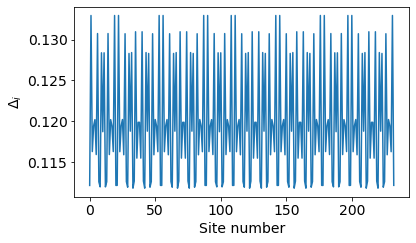

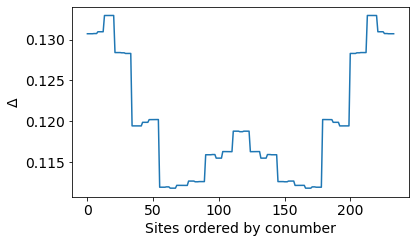

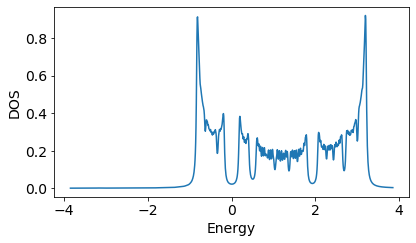

In [46]:
n = 11
phi = 1.2
u0 = 1.5
chain = chainFC(n = n, phi = phi,v = -1.5, u = 0.75 + u0, w = 0.1,PBC = True, phase = 0)
Model = simple_ring(chain)
Model.iterate()

fig, ax = plt.subplots()

ax.plot(Model.Delta)
ax.set_xlabel("Site number")
ax.set_ylabel("$\\Delta_i$")

fig, ax = plt.subplots()

seq = Fibonacci_sequence(n, phi)
ax.plot(Model.Delta[seq.get_ordering()])
ax.set_xlabel("Sites ordered by conumber")
ax.set_ylabel("$\\Delta$")

DOS, eex = Model.get_DOS(gam = 0.02)

fig, ax = plt.subplots()

ax.plot(eex, DOS)
ax.set_xlabel("Energy")
ax.set_ylabel("DOS")

### Average OP vs V

In [51]:
n = 12
phi = 0
w = 0.1
u0 = 1.5
Vs = 1 + 0.1*np.arange(10,-4,-1)
Models = {}
DOSes = {}
eexes = {}
for V in Vs:
    chain = chainFC(n = n, phi = phi,v = -V, u = V/2 + u0, w = w,PBC = True, phase = 0)
    Models[V] = simple_ring(chain)
    Models[V].iterate()

Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 14 iterations
Convergence took 15 iterations
Convergence took 16 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 20 iterations
Convergence took 22 iterations
Convergence took 24 iterations
Convergence took 26 iterations
Convergence took 28 iterations
Convergence took 33 iterations
Convergence took 51 iterations


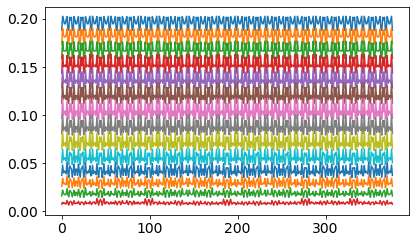

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'V/t in the range of 0.7--2.0')

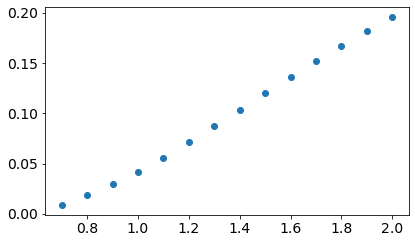

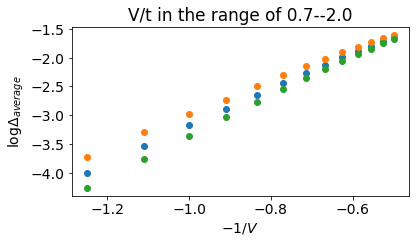

In [53]:
for V in Vs:
    plt.plot(Models[V].Delta.real)
plt.show()
    
plt.plot(Vs,[np.mean(Models[V].Delta.real) for V in Vs], "o")

fig, ax = plt.subplots()

ax.plot(-1/Vs[:-1],[np.log(np.mean(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.plot(-1/Vs[:-1],[np.log(np.max(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.plot(-1/Vs[:-1],[np.log(np.min(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.set_xlabel("$-1/V$")
ax.set_ylabel("$\\log \\Delta_{average}$")
ax.set_title("V/t in the range of 0.7--2.0")

###  T > 0

In [55]:
n = 11
phi = 0
w = 0.1
V = 1.5
u0 = 1.5
kTs = np.linspace(0.01,0.12,20)
betas = 1/kTs
Models = {}
DOSes = {}
eexes = {}
for beta in tqdm(betas):
    chain = chainFC(n = n, phi = phi,v = -V, u = V/2 + u0, w = w,PBC = True, phase = 0)
    Models[beta] = simple_ring(chain, beta = beta)
    Models[beta].iterate()


  5%|▌         | 1/20 [00:00<00:18,  1.04it/s]

Convergence took 17 iterations



 10%|█         | 2/20 [00:02<00:17,  1.00it/s]

Convergence took 17 iterations



 15%|█▌        | 3/20 [00:02<00:16,  1.02it/s]

Convergence took 17 iterations



 20%|██        | 4/20 [00:03<00:15,  1.03it/s]

Convergence took 17 iterations



 25%|██▌       | 5/20 [00:04<00:14,  1.02it/s]

Convergence took 17 iterations



 30%|███       | 6/20 [00:06<00:14,  1.01s/it]

Convergence took 18 iterations



 35%|███▌      | 7/20 [00:07<00:13,  1.04s/it]

Convergence took 18 iterations



 40%|████      | 8/20 [00:08<00:12,  1.07s/it]

Convergence took 19 iterations



 45%|████▌     | 9/20 [00:09<00:12,  1.14s/it]

Convergence took 20 iterations



 50%|█████     | 10/20 [00:11<00:12,  1.23s/it]

Convergence took 22 iterations



 55%|█████▌    | 11/20 [00:12<00:11,  1.32s/it]

Convergence took 24 iterations



 60%|██████    | 12/20 [00:14<00:11,  1.47s/it]

Convergence took 28 iterations



 65%|██████▌   | 13/20 [00:16<00:11,  1.65s/it]

Convergence took 32 iterations



 70%|███████   | 14/20 [00:18<00:11,  1.92s/it]

Convergence took 40 iterations



 75%|███████▌  | 15/20 [00:22<00:11,  2.38s/it]

Convergence took 54 iterations



 80%|████████  | 16/20 [00:27<00:13,  3.28s/it]

Convergence took 88 iterations


KeyboardInterrupt: 

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

KeyError: 9.223300970873787

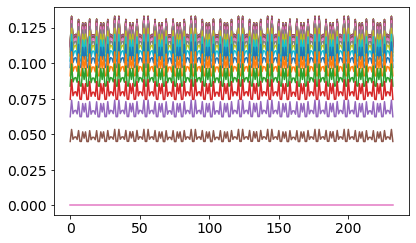

In [56]:
for beta in betas:
    plt.plot(Models[beta].Delta)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta_{average}$')

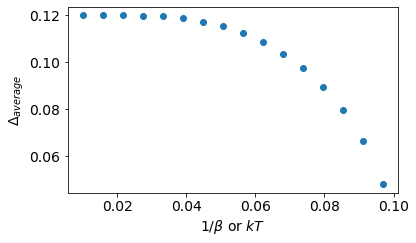

In [58]:
fig, ax = plt.subplots()
ax.plot(1/betas[:-4],[np.mean(Models[beta].Delta) for beta in betas[:-4]], "o")
ax.set_xlabel("$1/\\beta$ or $kT$")
ax.set_ylabel("$\\Delta_{average}$")


### u0 dependence

In [33]:
n = 11
phi = 0
u0s = np.linspace(0.75,3.0,51)
Models = {}
for u0 in u0s:
    chain = chainFC(n = n, phi = phi,v = -1.5, u = 0.75 + u0, w = 0.1,PBC = True, phase = 0)
    Models[u0] = simple_ring(chain)
    Models[u0].iterate()

Convergence took 22 iterations
Convergence took 24 iterations
Convergence took 26 iterations
Convergence took 29 iterations
Convergence took 28 iterations
Convergence took 26 iterations
Convergence took 23 iterations
Convergence took 22 iterations
Convergence took 21 iterations
Convergence took 20 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 12 iterations
Convergence took 12 iterations
Converge

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


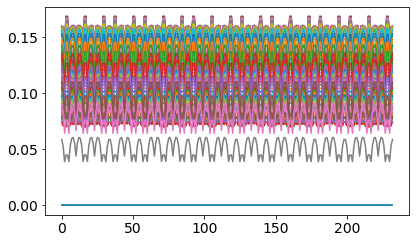

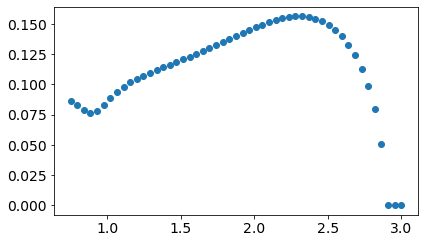

In [44]:
fig, ax = plt.subplots()

Delta_avgs = []
Delta_perp_array = []
seq = Fibonacci_sequence(n, phi)
for u0 in u0s:
    Delta_avgs.append(np.average(Models[u0].Delta))
    ax.plot(Models[u0].Delta.real)
    Delta_perp_array.append(Models[u0].Delta[seq.get_ordering()])
    
fig, ax = plt.subplots()
ax.plot(u0s, Delta_avgs, "o")
    

/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


Text(0, 0.5, 'u_0 -> chemical potential')

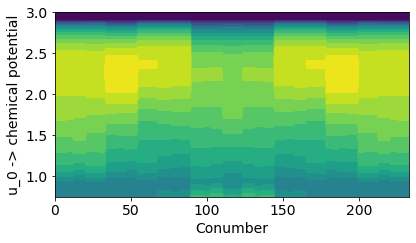

In [59]:
plt.contourf(np.arange(Fibonacci_number[n]+1),u0s,Delta_perp_array, 20)
plt.xlabel("Conumber")
plt.ylabel("u_0 -> chemical potential")

# Chemical pot at 0

## Average order parameter vs V

In [3]:
n = 12
phi = 0
w = 0.1
Vs = 1 + 0.1*np.arange(10,-4,-1)
Models = {}
DOSes = {}
eexes = {}
for V in Vs:
    chain = chainFC(n = n, phi = phi,v = -V, u = V/2, w = w,PBC = True, phase = 0)
    Models[V] = simple_ring(chain)
    Models[V].iterate()

Convergence took 16 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 20 iterations
Convergence took 21 iterations
Convergence took 23 iterations
Convergence took 24 iterations
Convergence took 26 iterations
Convergence took 28 iterations
Convergence took 30 iterations
Convergence took 33 iterations
Convergence took 37 iterations
Convergence took 60 iterations


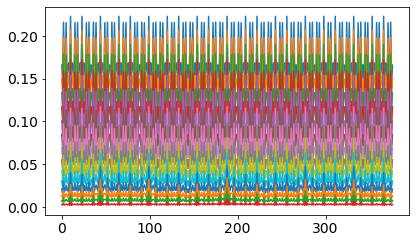

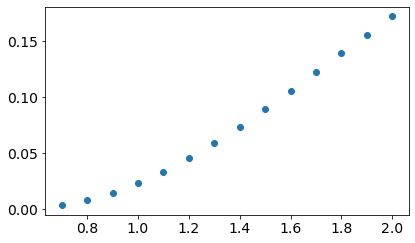

In [6]:
for V in Vs:
    plt.plot(Models[V].Delta.real)
plt.show()
    
plt.plot(Vs,[np.mean(Models[V].Delta.real) for V in Vs], "o")

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


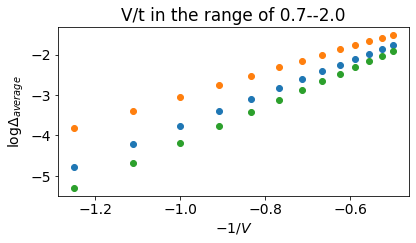

In [9]:
fig, ax = plt.subplots()

ax.plot(-1/Vs[:-1],[np.log(np.mean(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.plot(-1/Vs[:-1],[np.log(np.max(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.plot(-1/Vs[:-1],[np.log(np.min(Models[V].Delta)) for V in Vs[:-1]], "o")
ax.set_xlabel("$-1/V$")
ax.set_ylabel("$\\log \\Delta_{average}$")
ax.set_title("V/t in the range of 0.7--2.0")

plt.savefig("Images/Delta_vs_V.pdf")

## Self-similarity of OP

In [16]:
n = 15
phi = 0
w = 0.1
V = 1.5

chain = chainFC(n = n, phi = phi,v = -V, u = V/2, w = w,PBC = True, phase = 0)
Model = simple_ring(chain)
Model.iterate()

Convergence took 21 iterations


(array([0.08451293+0.j, 0.07053893+0.j, 0.11735536+0.j, ...,
        0.11735536+0.j, 0.07053893+0.j, 0.08451293+0.j]),
 array([-0.74993983, -0.74990245, -0.74998647, ..., -0.74998647,
        -0.74990245, -0.74993983]))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


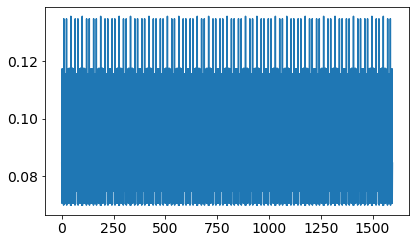

In [17]:
plt.plot(Model.Delta)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


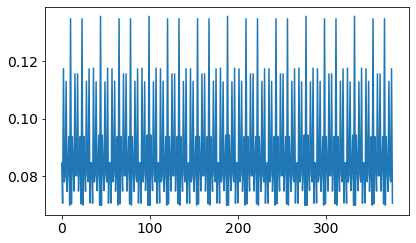

In [22]:
plt.plot(Model.Delta[1597//2-377//2:1597//2+377//2])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


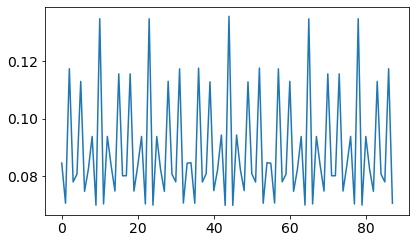

In [19]:
plt.plot(Model.Delta[1597//2-377//2:1597//2+377//2][377//2-89//2:377//2+89//2])

## Temperature dependence of average Delta

In [3]:
n = 8
phi = 0
w = 0.1
V = 1.5
kTs = np.linspace(0.01,0.12,20)
betas = 1/kTs
Models = {}
DOSes = {}
eexes = {}
for beta in tqdm(betas):
    chain = chainFC(n = n, phi = phi,v = -V, u = V/2, w = w,PBC = True, phase = 0)
    Models[beta] = simple_ring(chain, beta = beta)
    Models[beta].iterate()

 10%|█         | 2/20 [00:00<00:02,  7.62it/s]

Convergence took 21 iterations
Convergence took 21 iterations


 20%|██        | 4/20 [00:00<00:02,  7.64it/s]

Convergence took 21 iterations
Convergence took 22 iterations


 30%|███       | 6/20 [00:00<00:01,  7.56it/s]

Convergence took 22 iterations
Convergence took 24 iterations


 40%|████      | 8/20 [00:01<00:01,  6.99it/s]

Convergence took 25 iterations
Convergence took 28 iterations


 50%|█████     | 10/20 [00:01<00:01,  5.96it/s]

Convergence took 31 iterations
Convergence took 37 iterations


 55%|█████▌    | 11/20 [00:01<00:01,  5.16it/s]

Convergence took 47 iterations


 60%|██████    | 12/20 [00:02<00:01,  4.01it/s]

Convergence took 71 iterations


 65%|██████▌   | 13/20 [00:07<00:13,  1.94s/it]

Convergence took 1128 iterations


 70%|███████   | 14/20 [00:11<00:14,  2.42s/it]

Convergence took 678 iterations


 75%|███████▌  | 15/20 [00:15<00:13,  2.74s/it]

Convergence took 650 iterations


 80%|████████  | 16/20 [00:17<00:10,  2.63s/it]

Convergence took 427 iterations


 85%|████████▌ | 17/20 [00:19<00:07,  2.37s/it]

Convergence took 322 iterations


 90%|█████████ | 18/20 [00:20<00:04,  2.08s/it]

Convergence took 261 iterations


 95%|█████████▌| 19/20 [00:21<00:01,  1.83s/it]

Convergence took 221 iterations


100%|██████████| 20/20 [00:22<00:00,  1.14s/it]

Convergence took 193 iterations


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python

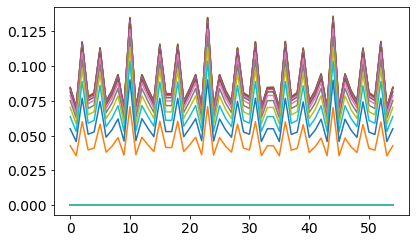

In [4]:
for beta in betas:
    plt.plot(Models[beta].Delta)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta_{averrag}$')

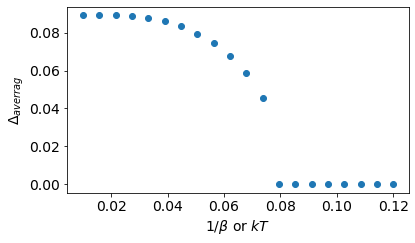

In [15]:
fig, ax = plt.subplots()
ax.plot(1/betas,[np.mean(Models[beta].Delta) for beta in betas], "o")
ax.set_xlabel("$1/\\beta$ or $kT$")
ax.set_ylabel("$\\Delta_{average}$")


## DOS vs w

Convergence took 23 iterations
Convergence took 23 iterations
Convergence took 21 iterations
Convergence took 20 iterations
Convergence took 18 iterations
Convergence took 16 iterations
Convergence took 14 iterations
Convergence took 13 iterations
Convergence took 15 iterations
Convergence took 17 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 22 iterations
Convergence took 27 iterations
Convergence took 32 iterations
Convergence took 37 iterations
Convergence took 37 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


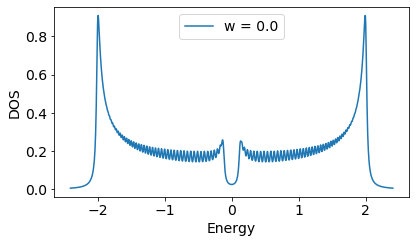

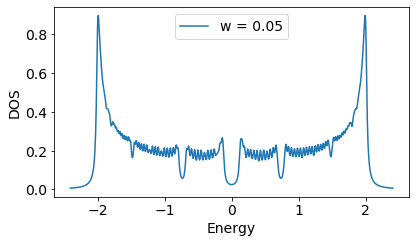

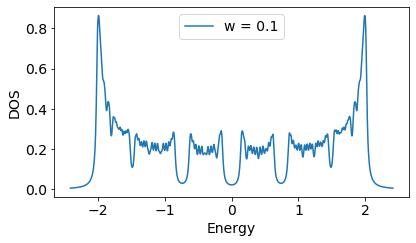

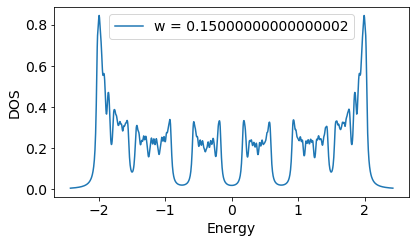

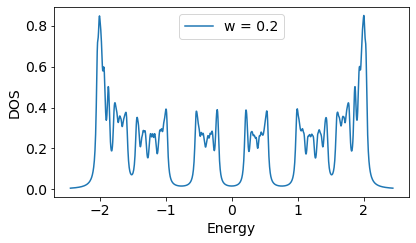

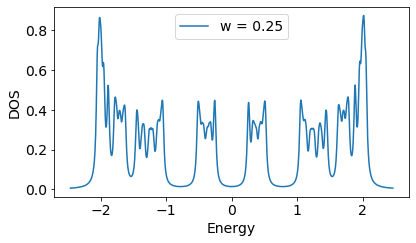

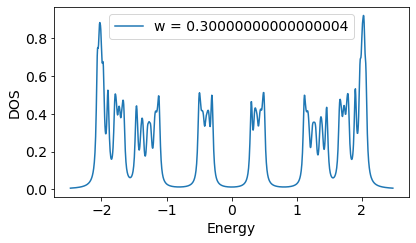

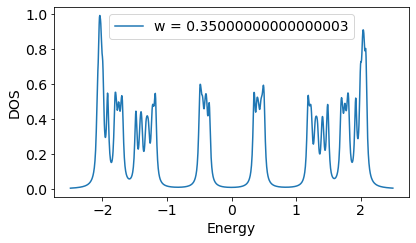

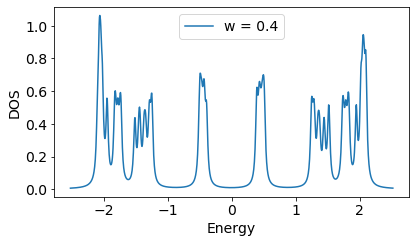

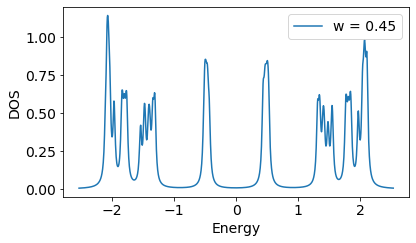

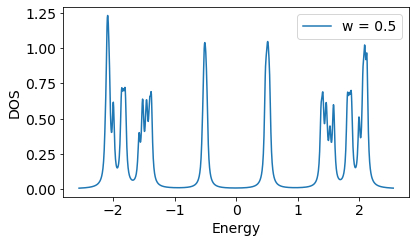

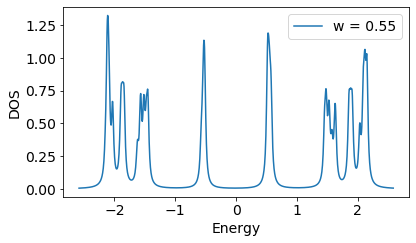

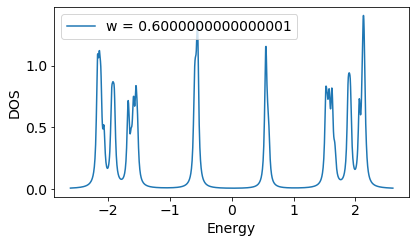

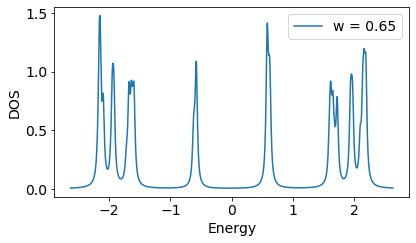

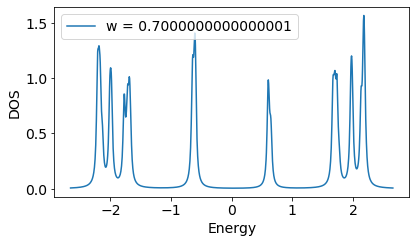

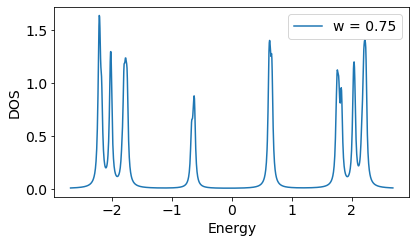

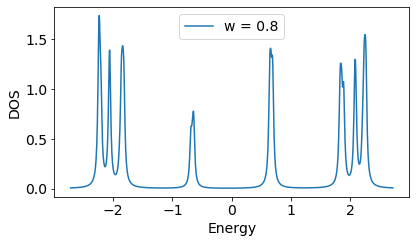

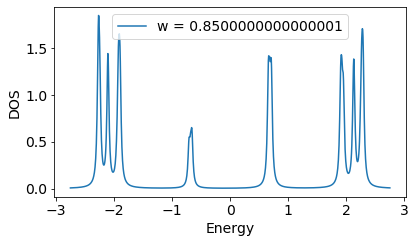

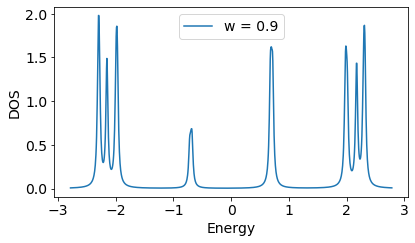

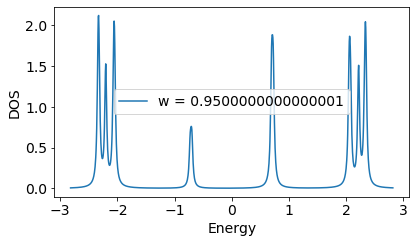

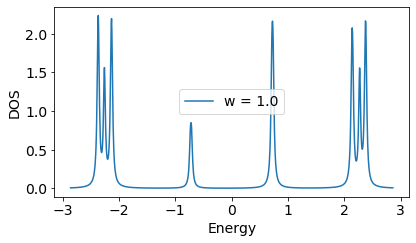

In [4]:
n = 11
phi = 0
wStep = 0.05 # Changed to a reasonable value for quick results.
ws = np.arange(0, 1+wStep, wStep)
Models = {}
DOSes = {}
eexes = {}
for w in ws:
    chain = chainFC(n = n, phi = phi,v = -1.5, u = 0.75, w = w,PBC = True, phase = 0)
    Models[w] = simple_ring(chain)
    Models[w].iterate()
    DOSes[w], eexes[w] = Models[w].get_DOS(gam = 0.02)
    
for w in ws:
    fig, ax = plt.subplots()
    ax.plot(eexes[w], DOSes[w], label = "w = {}".format(w)) 
    ax.set_xlabel("Energy")
    ax.set_ylabel("DOS")

    ax.legend()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


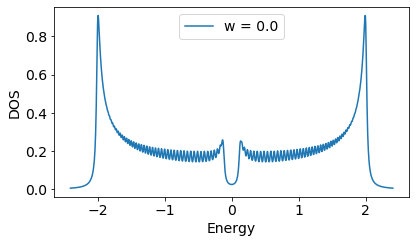

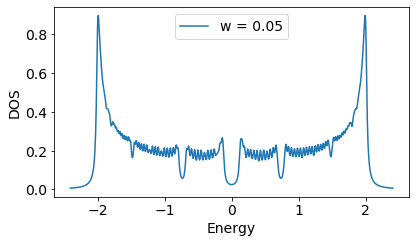

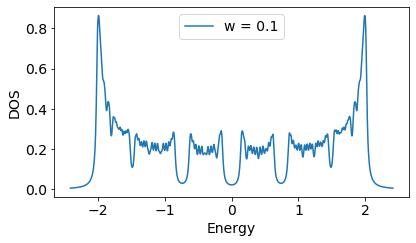

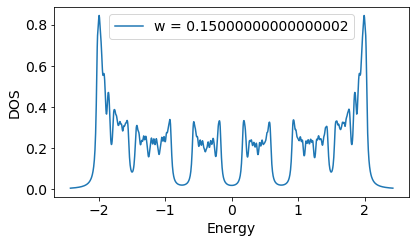

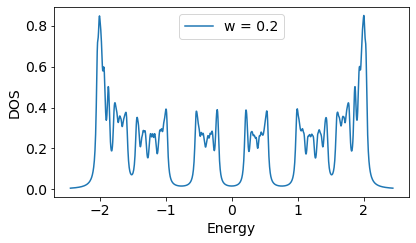

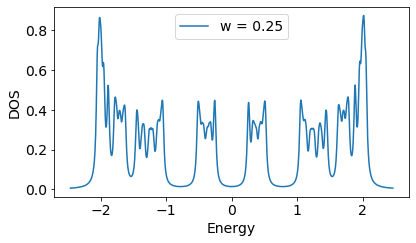

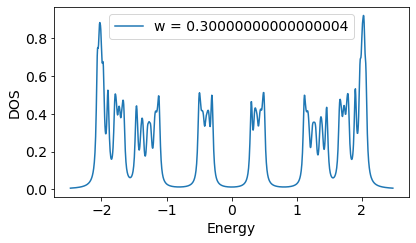

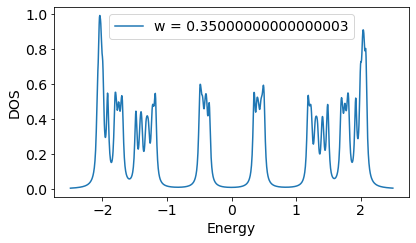

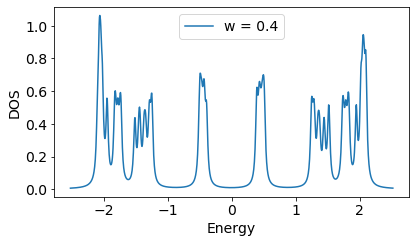

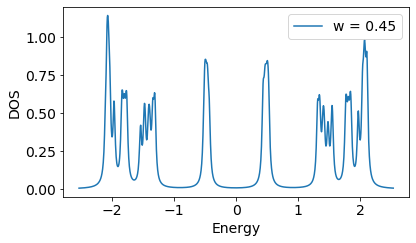

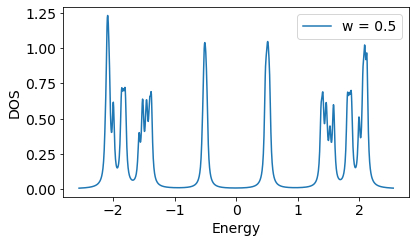

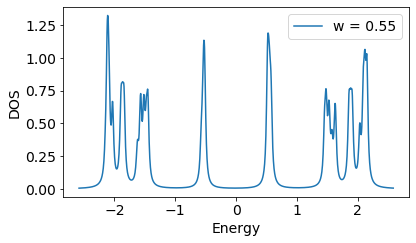

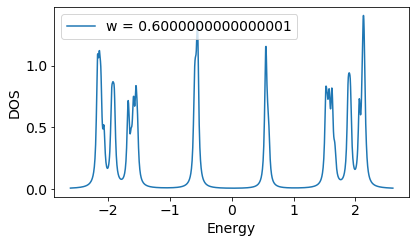

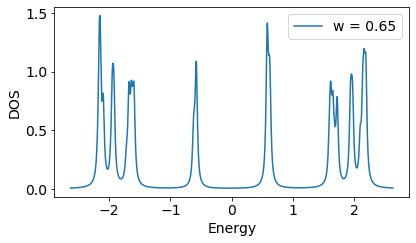

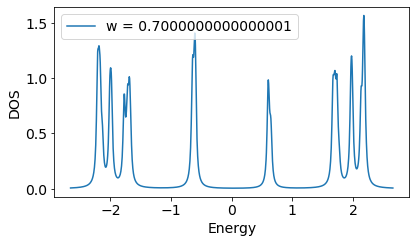

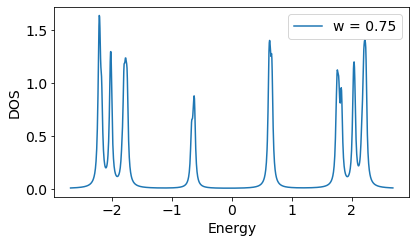

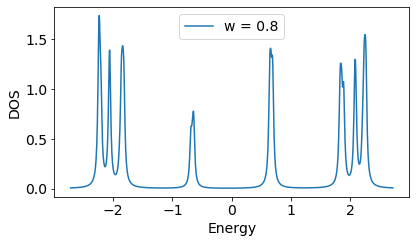

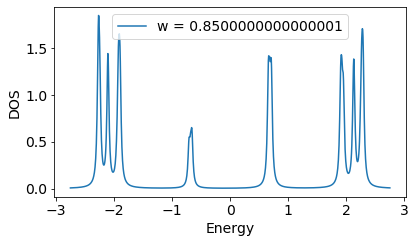

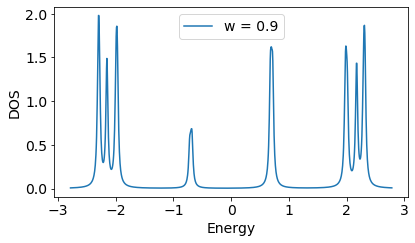

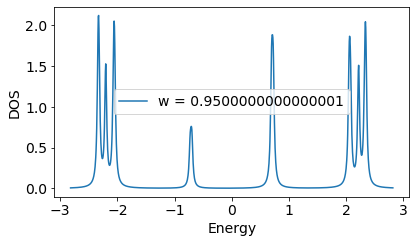

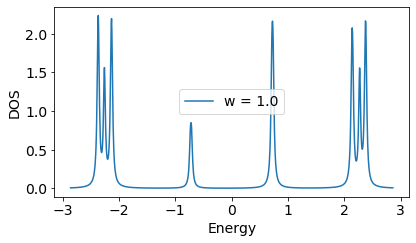

In [5]:
for w in ws:
    fig, ax = plt.subplots()
    ax.plot(eexes[w], DOSes[w], label = "w = {}".format(w)) 
    ax.set_xlabel("Energy")
    ax.set_ylabel("DOS")
    ax.legend()
#    fig.savefig("C:/Users/chris/Desktop/Summer 2020/Github/20201011/Mass DOS Plotting/"+f'{w:.3f}'+".png")

499
467
0.2909601155031707


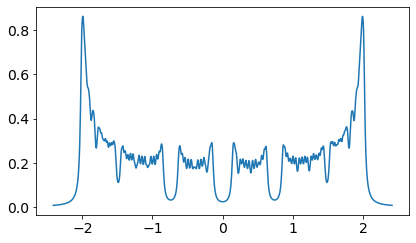

In [22]:
# Use classes for reusability
class DOS_SC:
    def __init__(self, eex, DOS):
        self.eex = eex
        self.DOS = DOS
        
        #argmin is better
        self.zeroindex = np.argmin(abs(self.eex))
        
    
    def find_coherence_peak(self):
        i = self.zeroindex
        # I was going to argue that using break here is not good programming practice, but I'm not sure anymore.
        while self.DOS[i-1]>self.DOS[i] or self.DOS[i+1]>self.DOS[i]:
            i += 1
        self.rightPeakIndex = i
        
        i = self.zeroindex
        while self.DOS[i-1]>self.DOS[i] or self.DOS[i+1]>self.DOS[i]:
            i += -1
        self.leftPeakIndex = i
        
        self.leftPeakHeight = self.DOS[self.leftPeakIndex]
        self.rightPeakHeight = self.DOS[self.rightPeakIndex]
        self.gapWidth = self.eex[self.rightPeakIndex] - self.eex[self.leftPeakIndex]
            
        

w = 0.1
test = DOS_SC(eexes[w],DOSes[w])
plt.plot(test.eex, test.DOS)
print(test.zeroindex)
test.find_coherence_peak()
print(test.leftPeakIndex)
print(test.leftPeakHeight)

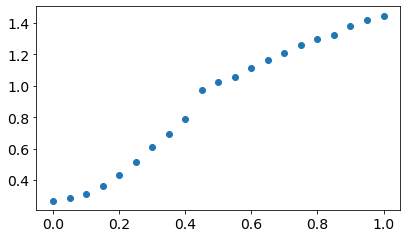

In [26]:
gaps = []
heightsLeft = []

for w in ws:
    test = DOS_SC(eexes[w], DOSes[w])
    test.find_coherence_peak()
    gaps.append(test.gapWidth)
    
plt.plot(ws, gaps, "o")

## DOS vs V

In [28]:
# Chris:
# We want to see the variation of the gap width w.r.t v.
# 1) Remember always, u = -v/2
# 2) w is constant
# 3) Let's do this four different values of w: 0, 0.05, 0.15, 0.4 
# 4) V > 0.8, V < 2.0

# Reuse n,phi,etc. from previous DOS vs W work
n = 11
phi = 0
ws = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
vStep = 0.01
vs = np.arange(-2.0,-0.8+vStep,vStep) # Heads up: Values close to -0.8 tend to take many iterations to converge.

Models = {}
DOSes = {}
eexes = {}
for w in ws:
    vModels = {}
    vDOSes = {}
    veexes = {}
    for v in vs:
        chain = chainFC(n = n, phi = phi,v = v, u = -v/2, w = w,PBC = True, phase = 0)
        vModels[v] = simple_ring(chain)
        vModels[v].iterate()
        vDOSes[v], veexes[v] = vModels[v].get_DOS(gam = 0.02)
    Models[w]=vModels
    DOSes[w]=vDOSes
    eexes[w]=veexes

Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Converge

Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 22 iterations
Convergence took 22 iterations
Converge

Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Converge

Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 19 iterations
Convergence took 20 iterations
Convergence took 20 iterations
Converge

Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 13 iterations
Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 14 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 15 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 16 iterations
Convergence took 17 iterations
Convergence took 17 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 18 iterations
Convergence took 19 iterations
Convergence took 19 iterations


In [45]:
for w in ws:
    for v in vs:
        fig, ax = plt.subplots()
        ax.plot(eexes[w][v], DOSes[w][v], label = "w = {}".format(f'{w:.2f}')+" v = {}".format(f'{v:.2f}'))
        ax.set_xlabel("Energy")
        ax.set_ylabel("DOS")
        ax.legend()
        #fig.savefig("C:/Users/chris/Desktop/Summer 2020/Github/20201020/Mass DOS Plotting/"+"w = {}".format(f'{w:.2f}')+"/"+"v = {}".format(f'{v:.2f}')+".png")

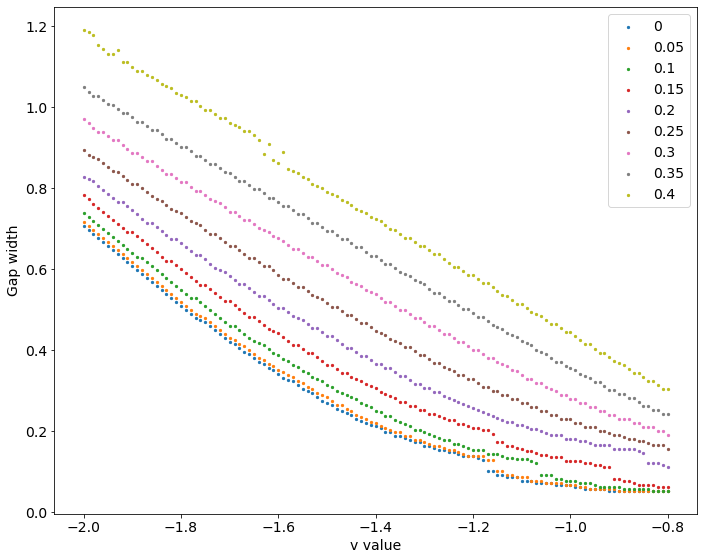

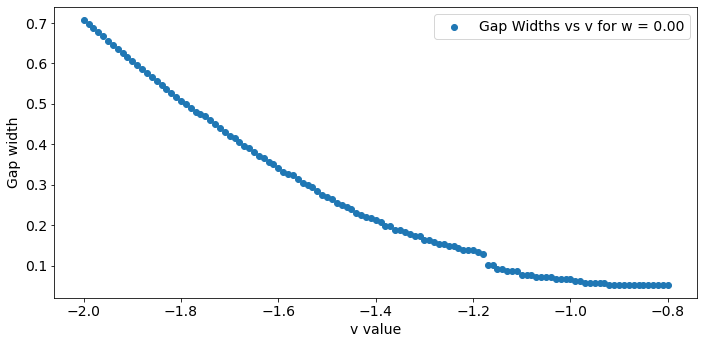

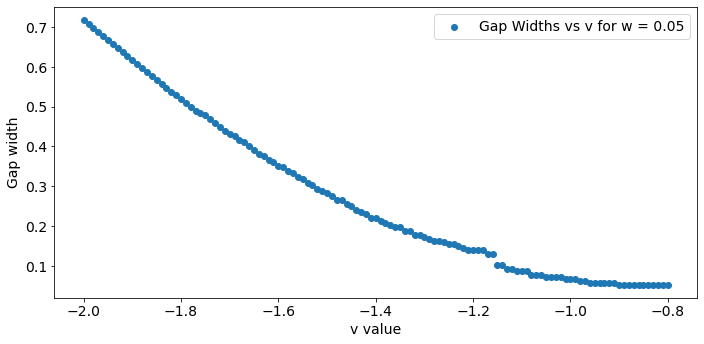

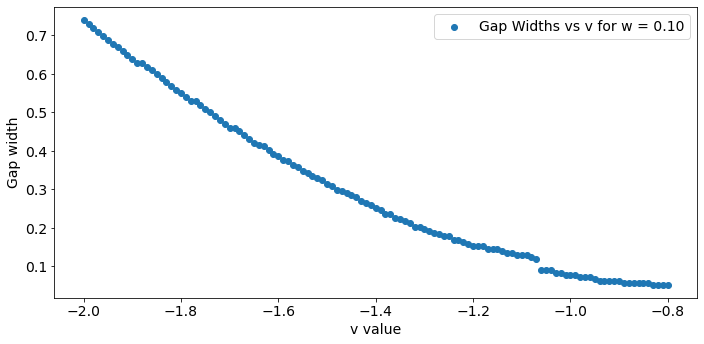

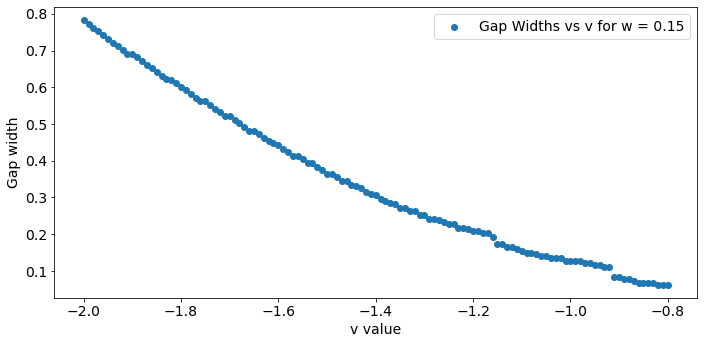

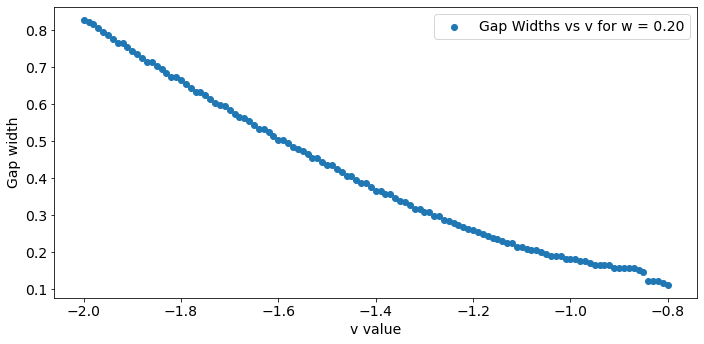

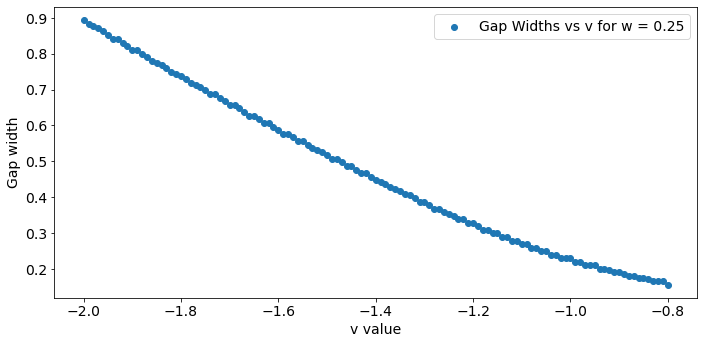

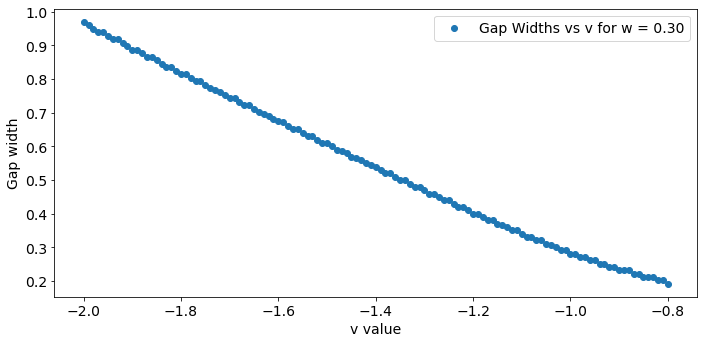

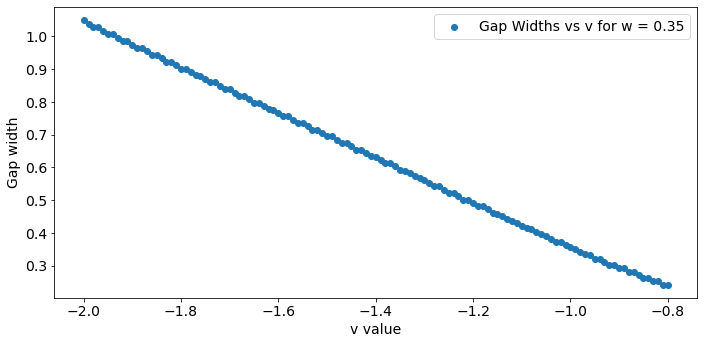

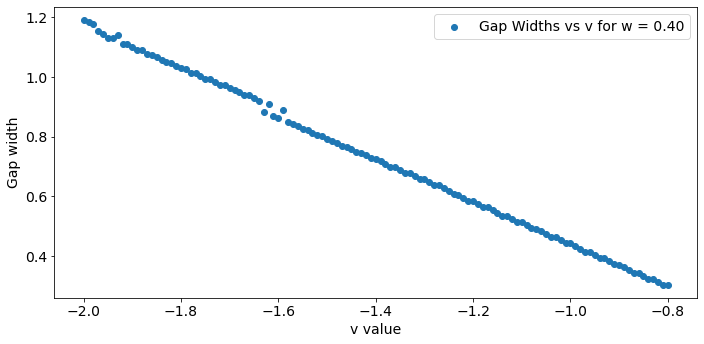

In [44]:
gaps = []
for i in range(len(ws)):
    gaps.append([])
    for v in vs:
        test = DOS_SC(eexes[ws[i]][v], DOSes[ws[i]][v])
        test.find_coherence_peak()
        gaps[i].append(test.gapWidth)

# Produce a combined plot for the gap width vs. v scatter plots for various w, colored according to combinedPlotColors
    # Need at least as many colors than w values.
combinedPlotColors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
fig, ax = plt.subplots(figsize=(10,8))
for i in range(len(ws)): 
    ax.scatter(vs, gaps[i], s=5,c=combinedPlotColors[i],label = "Gap Widths vs v for w = {}".format(f'{ws[i]:.2f}'))
ax.set_xlabel("v value")
ax.set_ylabel("Gap width")
ax.legend(ws)

# Produce individual plots for gap width vs v
for i in range(len(ws)):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(vs, gaps[i],label = "Gap Widths vs v for w = {}".format(f'{ws[i]:.2f}'))
    ax.set_xlabel("v value")
    ax.set_ylabel("Gap width")
    ax.legend()

## Basic calculations test

Convergence took 21 iterations


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta_i$')

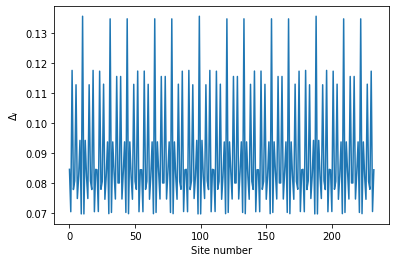

In [2]:
n = 11
phi = 1.2
chain = chainFC(n = n, phi = phi,v = -1.5, u = 0.75, w = 0.1,PBC = True, phase = 0)
Model = simple_ring(chain)
Model.iterate()

fig, ax = plt.subplots()

ax.plot(Model.Delta)
ax.set_xlabel("Site number")
ax.set_ylabel("$\\Delta_i$")

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\Delta$')

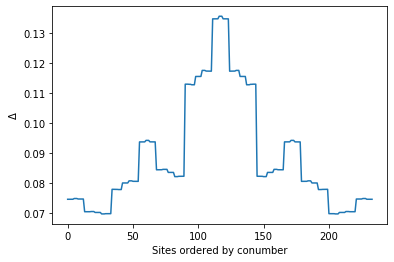

In [4]:
fig, ax = plt.subplots()

seq = Fibonacci_sequence(n, phi)
ax.plot(Model.Delta[seq.get_ordering()])
ax.set_xlabel("Sites ordered by conumber")
ax.set_ylabel("$\\Delta$")

Text(0, 0.5, 'DOS')

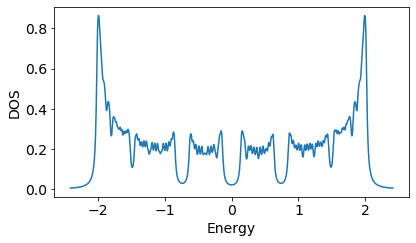

In [7]:
DOS, eex = Model.get_DOS(gam = 0.02)

fig, ax = plt.subplots()

ax.plot(eex, DOS)
ax.set_xlabel("Energy")
ax.set_ylabel("DOS")

In [9]:
phases = np.linspace(-np.pi,np.pi,50)
ev_list = []
for phase in phases:
    chain = chainFC(n = 12, v = -1.5, u = 0.75, w = 0.1,PBC = True, phase = phase)
    Model = simple_ring(chain)
    Model.iterate()
    ev_list.append(Model.evals)
    

Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations
Convergence took 21 iterations


[Text(0, 0, '$-\\pi/2$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi/2$')]

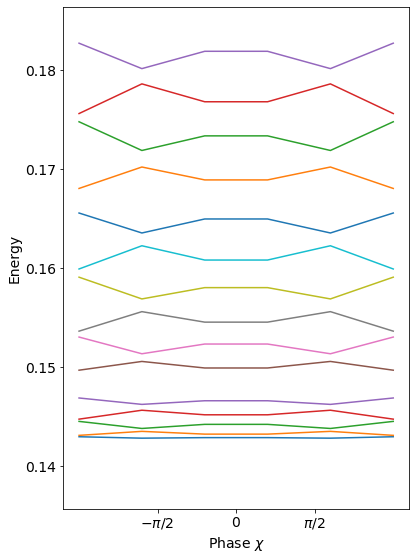

In [10]:
fig, ax = plt.subplots(figsize = (6,8))

ii = 15

ev_array = np.array(ev_list).T
[ax.plot(phases,ev) for ev in ev_array[:ii]]
ax.set_ylim([0.95*np.min(ev_array[:ii]), 1.02*np.max(ev_array[:ii])])
ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("Energy")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])


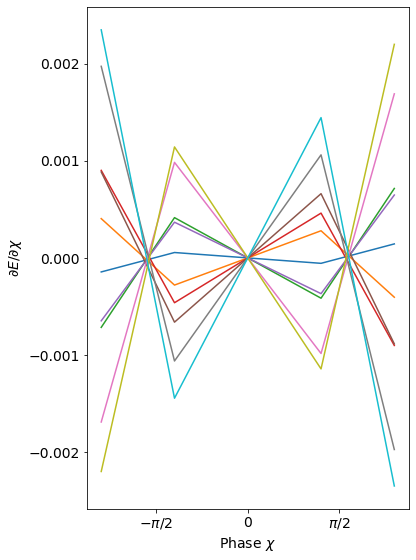

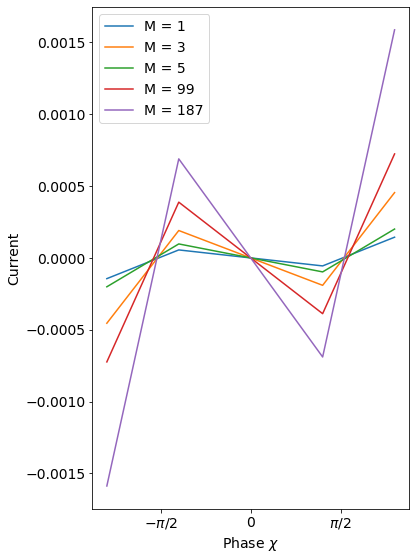

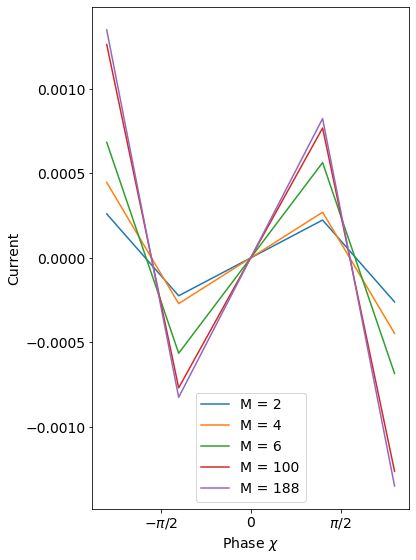

In [11]:
fig, ax = plt.subplots(figsize = (6,8))

ii = 10

ev_array = np.array(ev_list).T
[ax.plot((phases[1:] + phases[:-1])/2,np.diff(ev)) for ev in ev_array[:ii]]

ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("$\\partial E / \\partial \\chi$")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])

plt.savefig("temp_phase.pdf")

fig, ax = plt.subplots(figsize = (6,8))
ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("Current")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])

i = 0
for ii in (1,3,5,99,187):
    diff = [np.diff(ev) for ev in ev_array[:ii]]
    current = np.sum(diff,0)
    ax.plot((phases[1:] + phases[:-1])/2,current, "C"+str(i), label = "M = " + str(ii))
    i += 1
plt.legend()


fig, ax = plt.subplots(figsize = (6,8))
ax.set_xlabel("Phase $\\chi$")
ax.set_ylabel("Current")
ax.set_xticks([-np.pi/2,0,np.pi/2])
ax.set_xticklabels(["$-\\pi/2$","$0$","$\\pi/2$"])

i = 0
for ii in (2,4,6,100,188):
    diff = [np.diff(ev) for ev in ev_array[:ii]]
    current = np.sum(diff,0)
    ax.plot((phases[1:] + phases[:-1])/2,current, "C"+str(i), label = "M = " + str(ii))
    i += 1
plt.legend()



In [32]:
tau = (1 + np.sqrt(5))/2

In [52]:
w = 1.3
wa = 2*w/(1+tau)
tA = 1 - 2*w/(1+tau)
tB = 1 + tau*wa
print(tA, tB)

0.006888370749726591 2.6068883707497266
